Data Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.80000

<Figure size 1200x600 with 0 Axes>

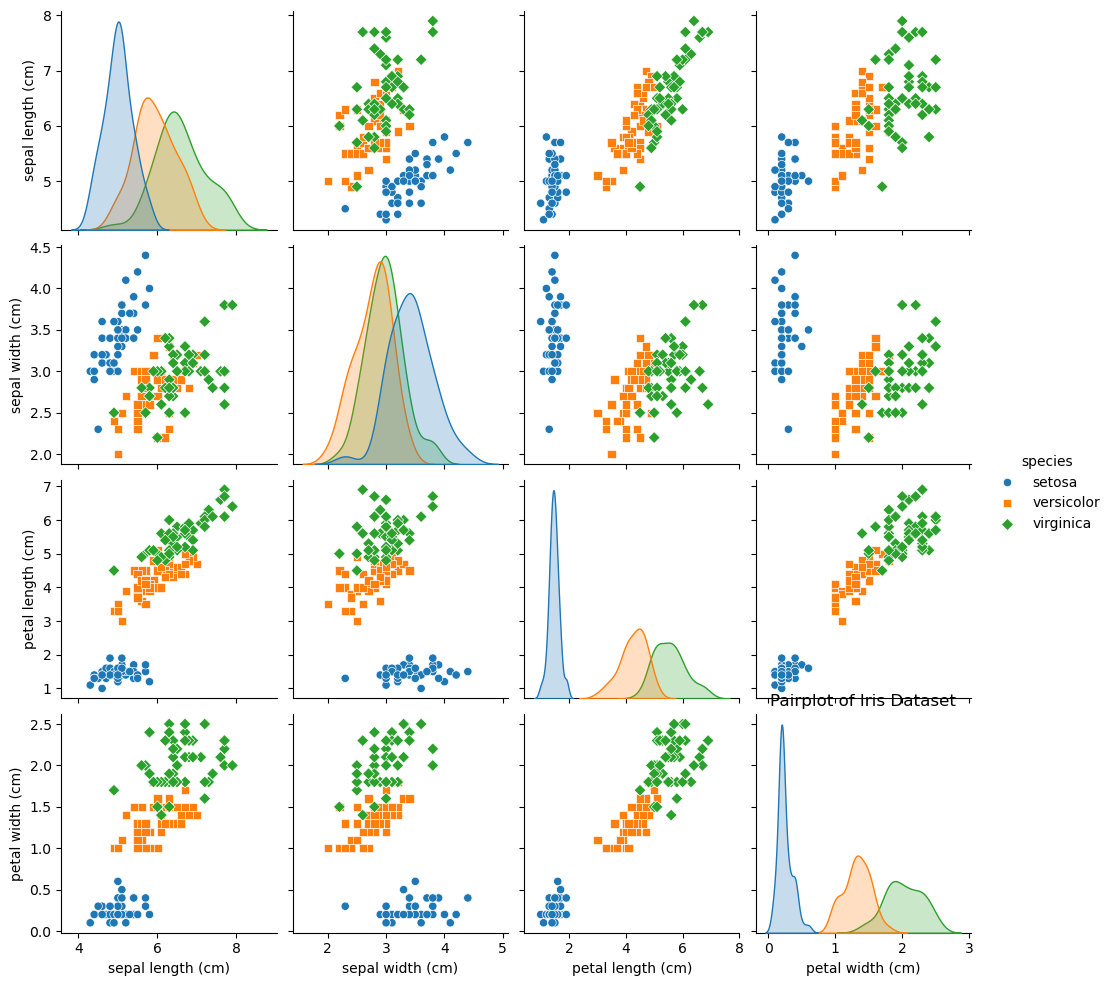

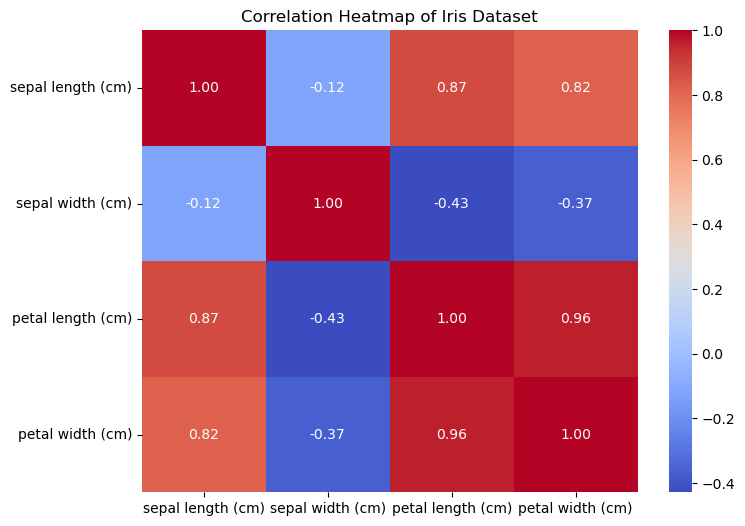


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Score: 0.97

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


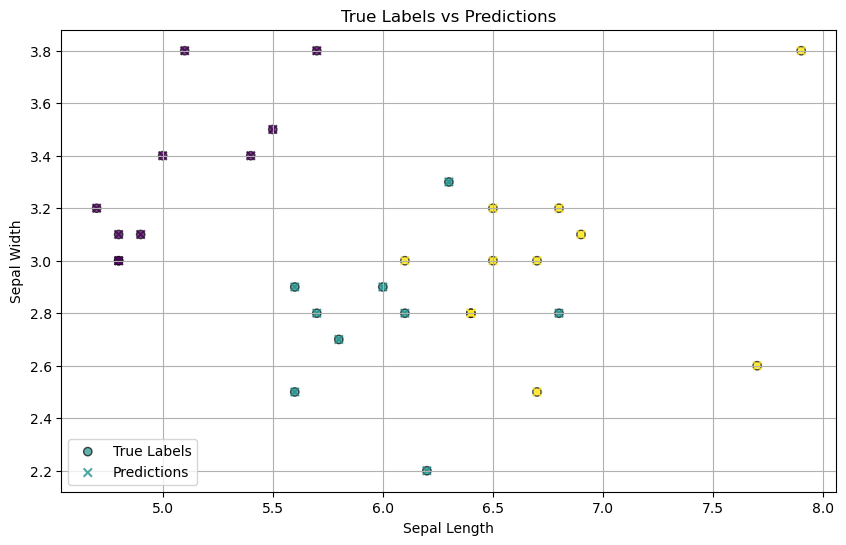

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, target_names)

# Data Overview
print("Data Overview:")
print(iris_df.head())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(iris_df.describe())

# Unique species
print("\nUnique Species:")
print(iris_df['species'].value_counts())

# Correlation Matrix
correlation = iris_df.drop('species', axis=1).corr()
print("\nCorrelation Matrix:")
print(correlation)

# Visualizations
plt.figure(figsize=(12, 6))

# Pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.title('Pairplot of Iris Dataset')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Cross-Validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

# Training the model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualizing predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True Labels', edgecolor='k', alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Predictions', alpha=0.8)
plt.title('True Labels vs Predictions')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()


Data Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.80000

<Figure size 1200x600 with 0 Axes>

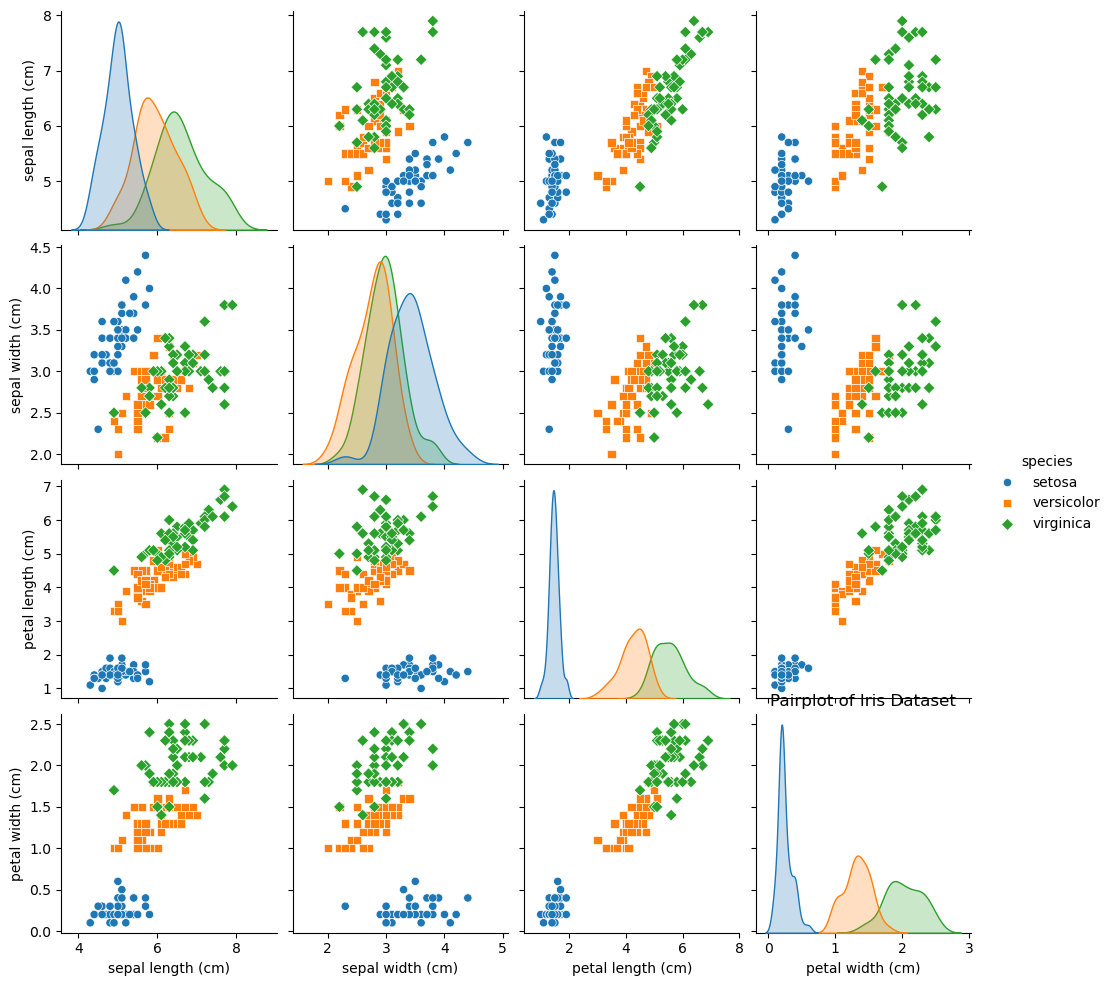

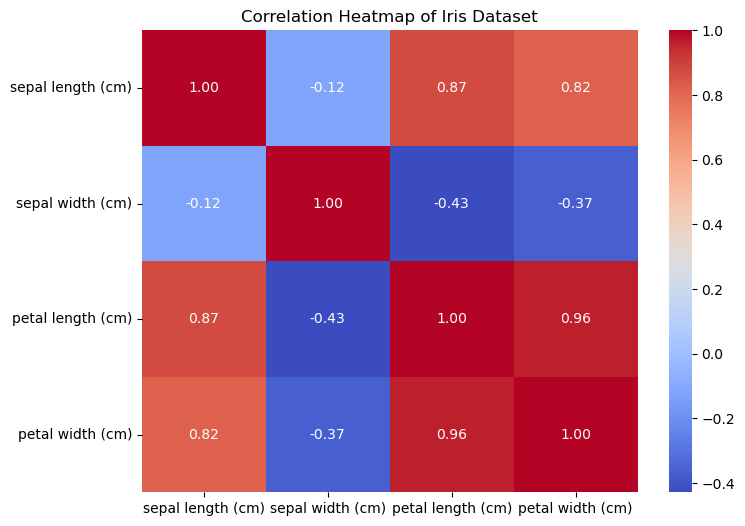


Current value of k: 1

Cross-Validation Scores for k=1: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Cross-Validation Score for k=1: 0.96

Confusion Matrix for k=1:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=1: 1.00


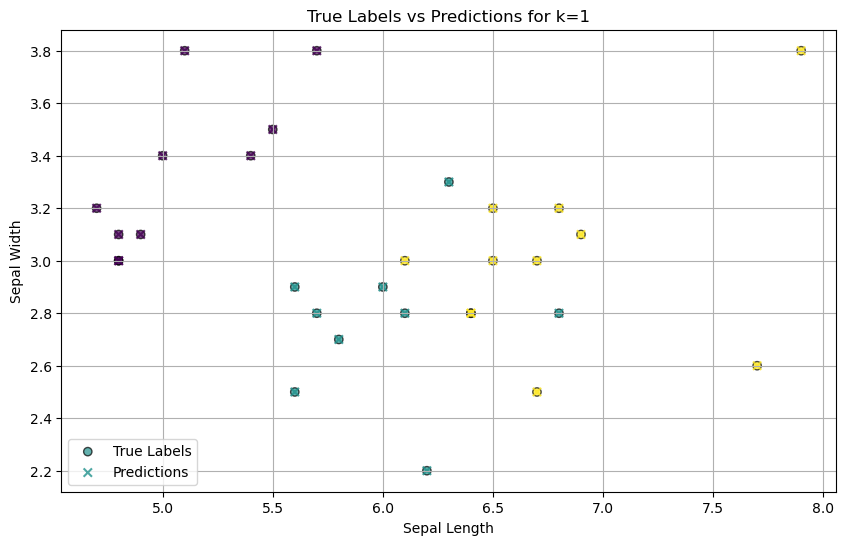


Current value of k: 2

Cross-Validation Scores for k=2: [0.96666667 0.93333333 0.93333333 0.9        1.        ]
Mean Cross-Validation Score for k=2: 0.95

Confusion Matrix for k=2:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=2: 1.00


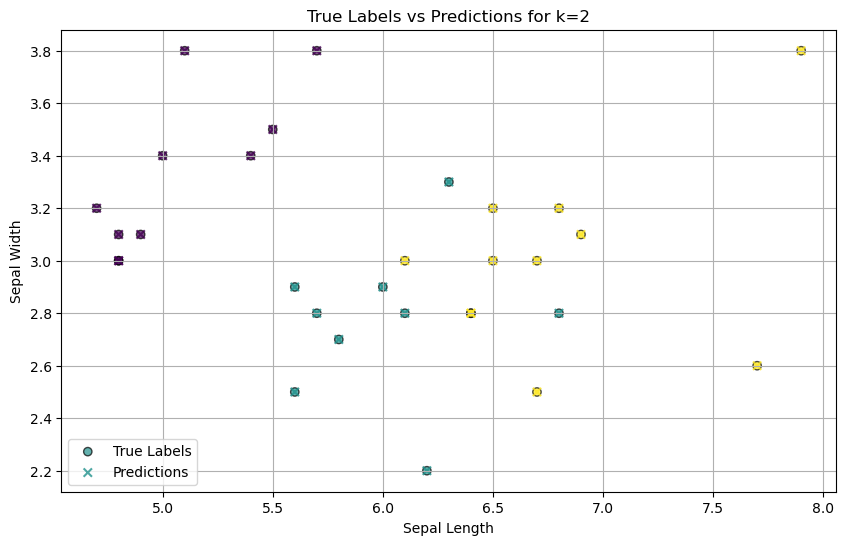


Current value of k: 3

Cross-Validation Scores for k=3: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Score for k=3: 0.97

Confusion Matrix for k=3:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=3: 1.00


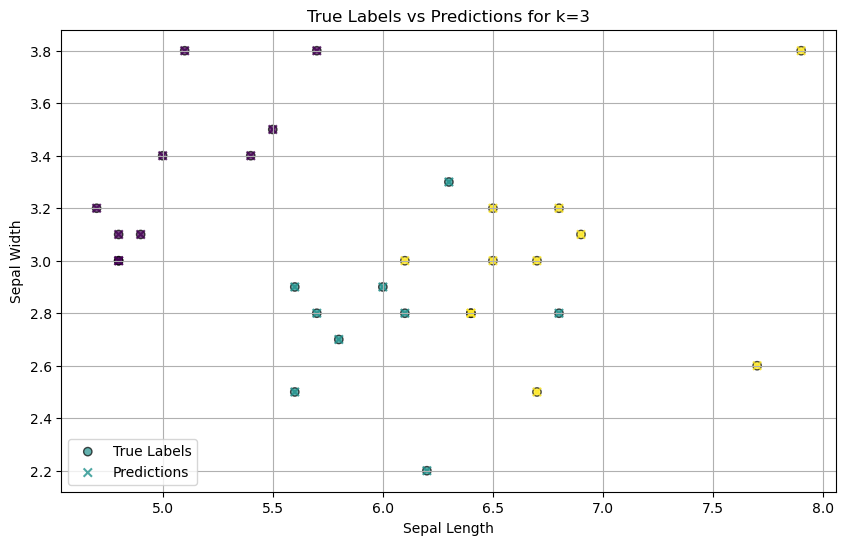


Current value of k: 4

Cross-Validation Scores for k=4: [0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
Mean Cross-Validation Score for k=4: 0.97

Confusion Matrix for k=4:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=4: 1.00


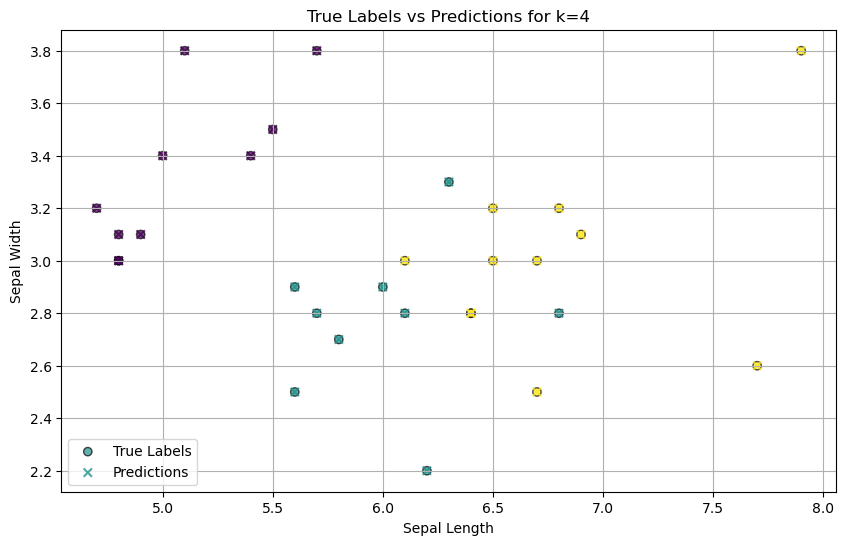


Current value of k: 5

Cross-Validation Scores for k=5: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Cross-Validation Score for k=5: 0.97

Confusion Matrix for k=5:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=5:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=5: 1.00


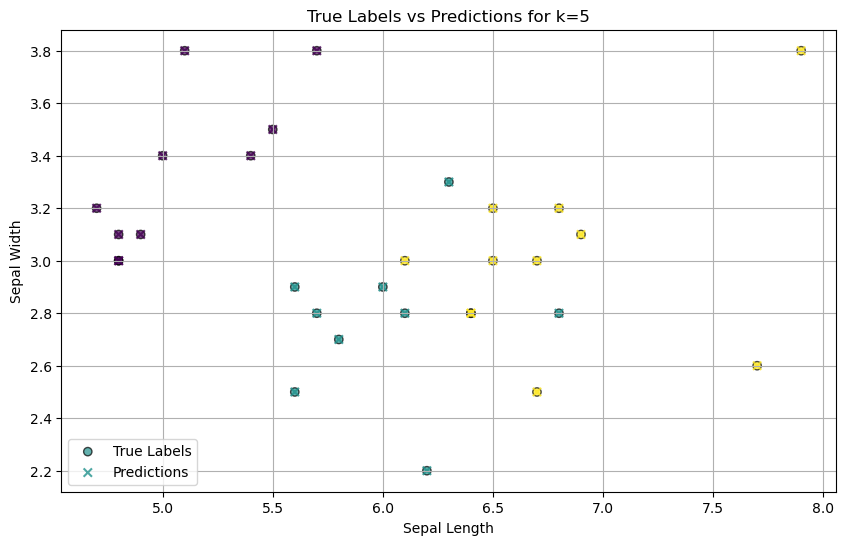


Current value of k: 6

Cross-Validation Scores for k=6: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean Cross-Validation Score for k=6: 0.98

Confusion Matrix for k=6:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=6:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=6: 1.00


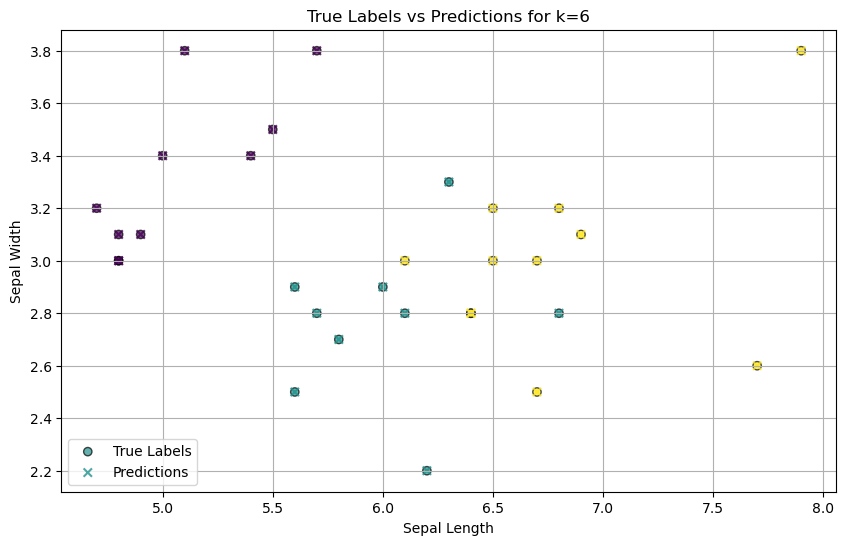


Current value of k: 7

Cross-Validation Scores for k=7: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean Cross-Validation Score for k=7: 0.98

Confusion Matrix for k=7:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report for k=7:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy for k=7: 0.97


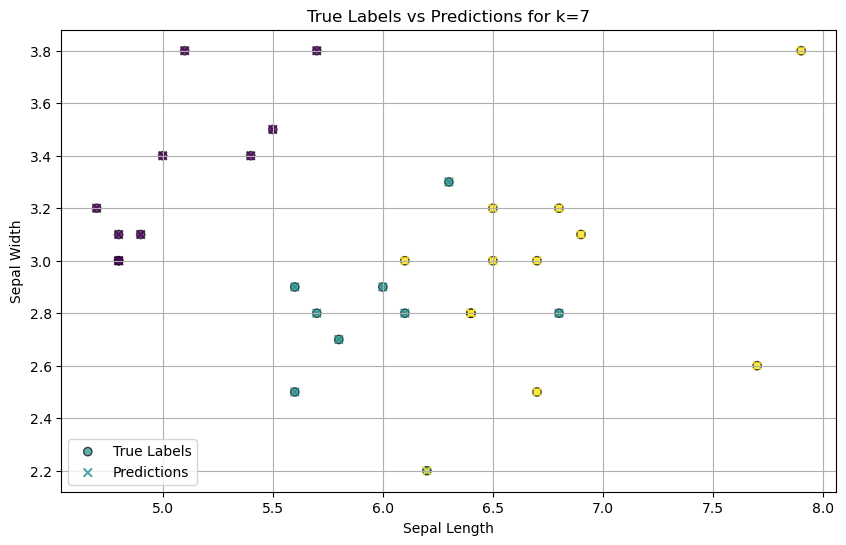


Current value of k: 8

Cross-Validation Scores for k=8: [0.96666667 1.         0.93333333 0.93333333 1.        ]
Mean Cross-Validation Score for k=8: 0.97

Confusion Matrix for k=8:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=8:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=8: 1.00


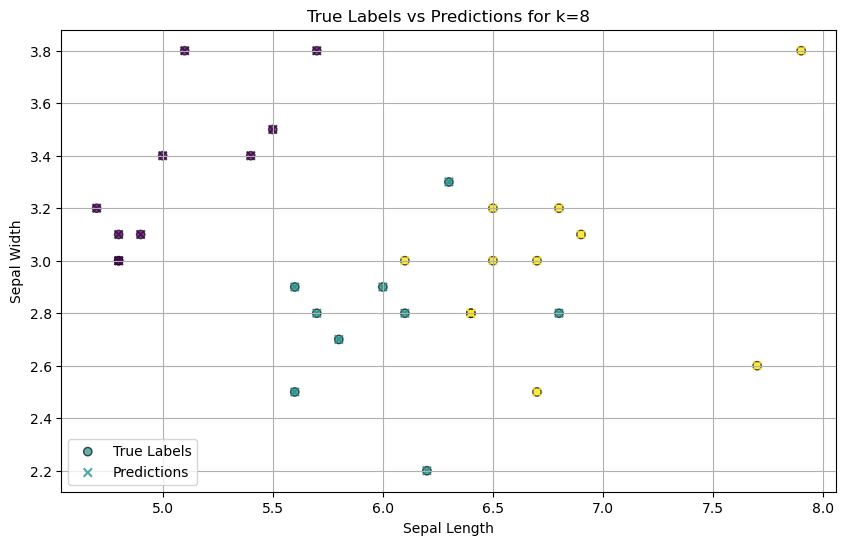


Current value of k: 9

Cross-Validation Scores for k=9: [0.96666667 1.         0.96666667 0.93333333 1.        ]
Mean Cross-Validation Score for k=9: 0.97

Confusion Matrix for k=9:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=9:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=9: 1.00


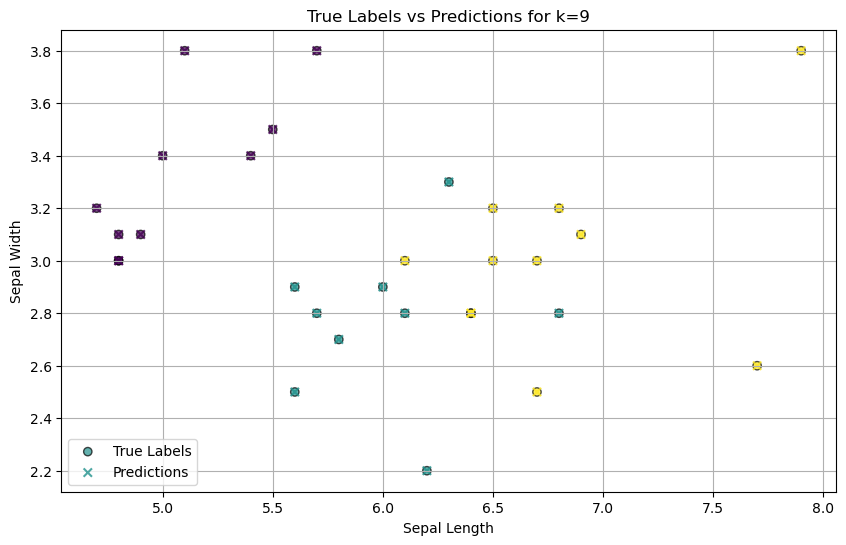


Current value of k: 10

Cross-Validation Scores for k=10: [0.96666667 1.         1.         0.93333333 1.        ]
Mean Cross-Validation Score for k=10: 0.98

Confusion Matrix for k=10:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report for k=10:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for k=10: 1.00


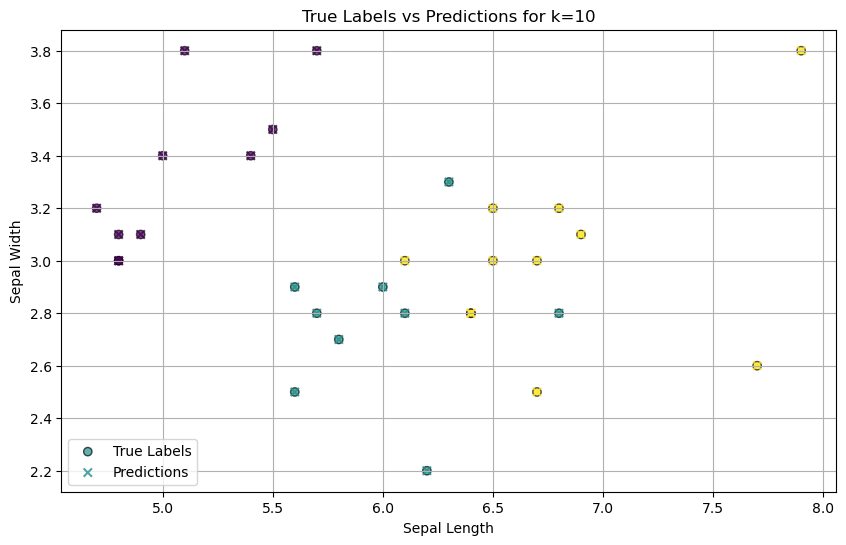

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, target_names)

# Data Overview
print("Data Overview:")
print(iris_df.head())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(iris_df.describe())

# Unique species
print("\nUnique Species:")
print(iris_df['species'].value_counts())

# Correlation Matrix
correlation = iris_df.drop('species', axis=1).corr()
print("\nCorrelation Matrix:")
print(correlation)

# Visualizations
plt.figure(figsize=(12, 6))

# Pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.title('Pairplot of Iris Dataset')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over k values from 1 to 10
for k in range(1, 11):
    print(f"\nCurrent value of k: {k}")  # Print the current value of k

    # KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Cross-Validation
    cv_scores = cross_val_score(knn, X, y, cv=5)
    print(f"\nCross-Validation Scores for k={k}: {cv_scores}")
    print(f"Mean Cross-Validation Score for k={k}: {cv_scores.mean():.2f}")

    # Training the model
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Evaluation
    print(f"\nConfusion Matrix for k={k}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report for k={k}:")
    print(classification_report(y_test, y_pred))

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.2f}")

    # Visualizing predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True Labels', edgecolor='k', alpha=0.7)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Predictions', alpha=0.8)
    plt.title(f'True Labels vs Predictions for k={k}')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.grid()
    plt.show()
